<h1 align="center">Volume 4: Inverse Problems.</h1>

    Samuel Goldrup
    Math 439
    26 January 2023

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib
matplotlib.use('nbAgg')
from matplotlib import pyplot as plt

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

<IPython.core.display.Javascript object>


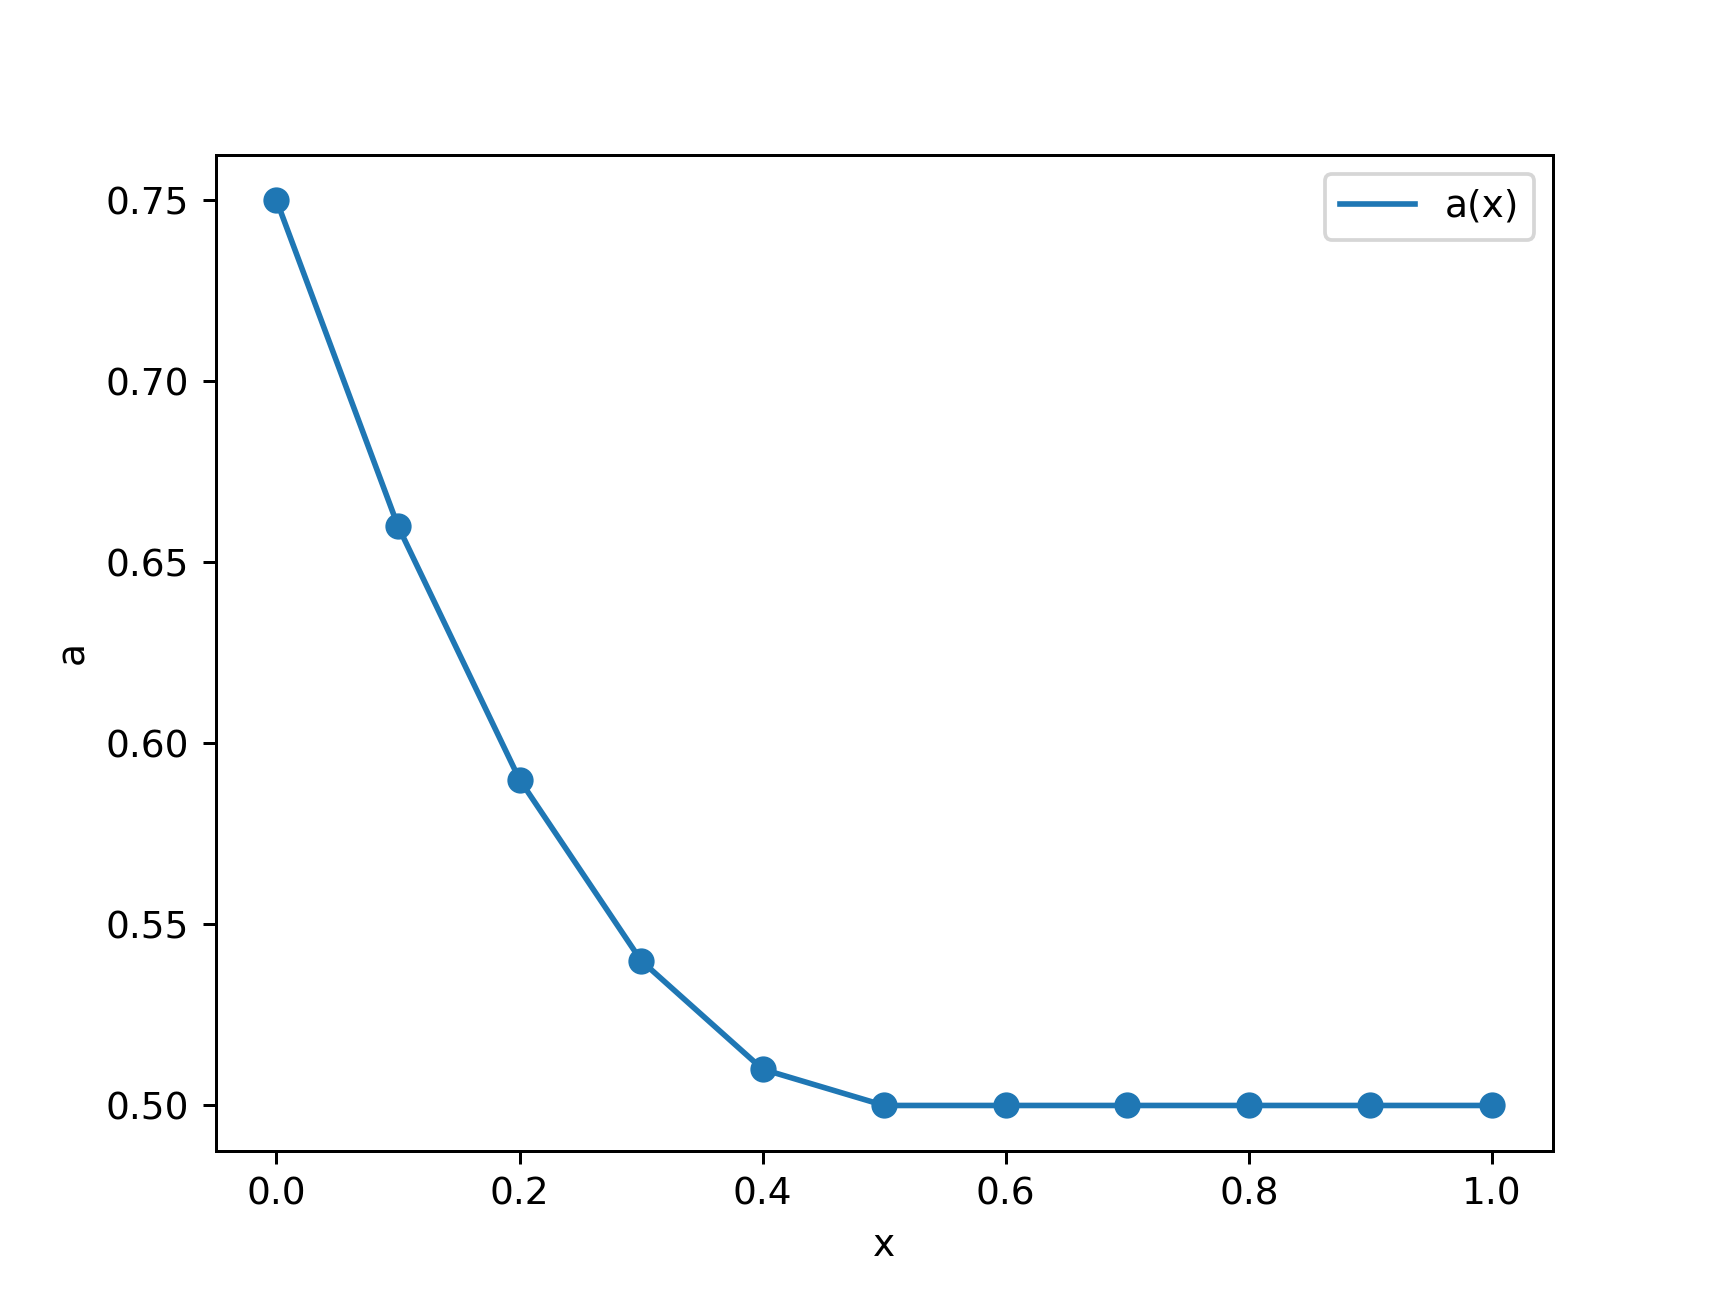

In [2]:
def f(x): #piecewise defined mathematical function
    if x <= 1/2:
        return -6*x**2 + 3*x - 1
    elif x <= 1:
        return -1
u_prime = lambda x: 2*x + 1/2 #u'

c0,c1= 3/8, 5/4
N = 11 #11 points
a0 = c0/u_prime(0)
an = c1/u_prime(1)

x_j = 0.1*np.arange(N)

def residual(a_j): #sum of squared residuals 
    return np.sum([((1/aj)*(c0 - quad(f,0,xj)[0]) - u_prime(xj))**2 for (xj,aj) in zip(x_j[1:-1],a_j)])

guess = np.ones(N-2) #starting guess

a_mid = minimize(residual,guess).x

a_j = np.concatenate(([a0],a_mid,[an]))

plt.plot(x_j,a_j,label="a(x)")
plt.xlabel('x')
plt.ylabel('a')
plt.scatter(x_j,a_j)
plt.legend()
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

<IPython.core.display.Javascript object>


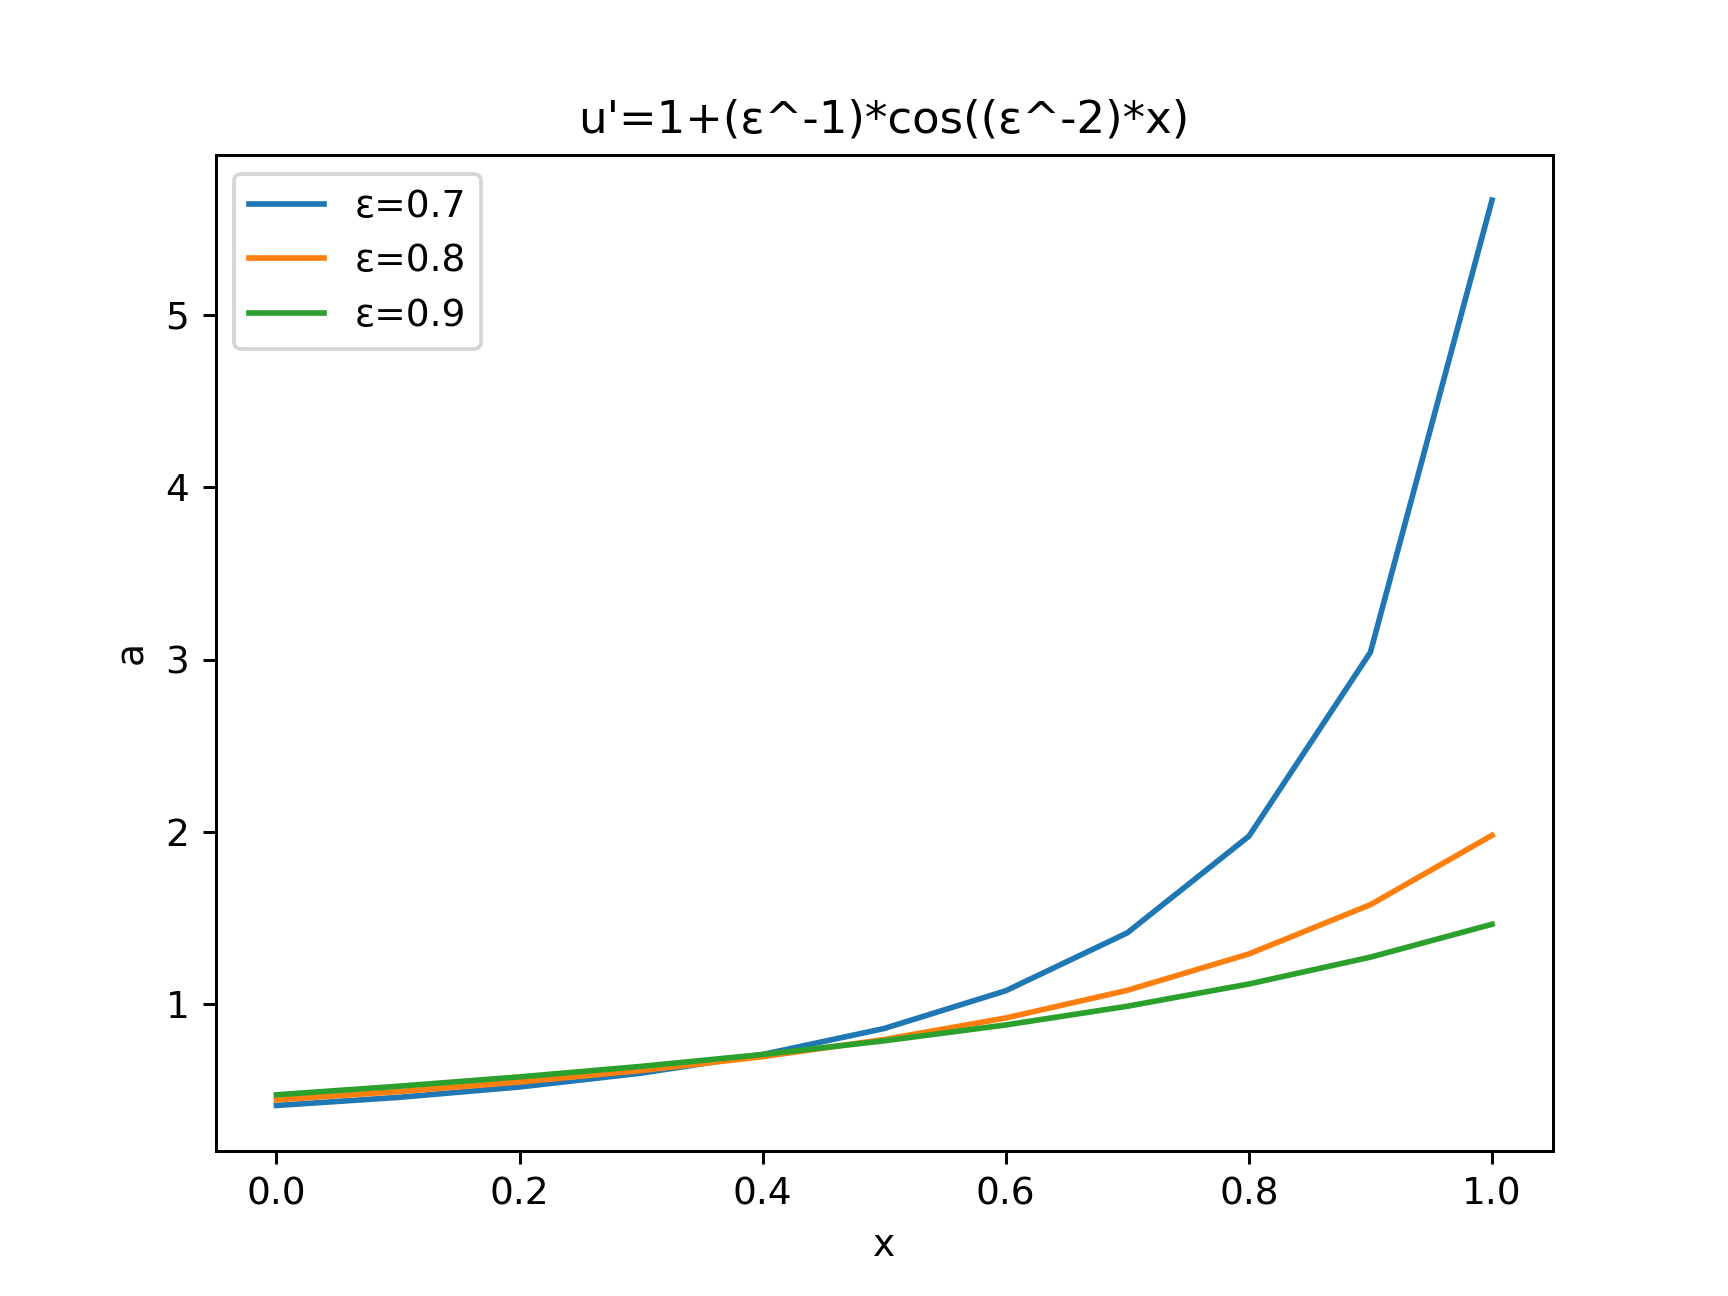

In [3]:
f = lambda x: -1
N = 11
x_j = np.linspace(0,1,N) #grid of 11 points
guess = np.ones(N-2)

solns = []
epsilons = 0.7, 0.8, 0.9 

for eps in epsilons:
    u_prime = lambda x: 1 + (eps**-1)*np.cos((eps**-2)*x) #u'
    a0 = 1/u_prime(0) #enforce bc's
    an = 2/u_prime(1)
    def residual(a_j):
        return np.sum([((1/aj)*(1 - quad(f,0,xj)[0]) - u_prime(xj))**2 for (xj,aj) in zip(x_j[1:-1],a_j)])
    a_mid = minimize(residual,guess).x
    a_j = np.concatenate(([a0],a_mid,[an]))
    solns.append(a_j)

for eps, a_j in zip(epsilons, solns): #iterate over two lists simultaneously
    plt.plot(x_j,a_j,label=f"ε={eps}")
    plt.title("u'=1+(ε^-1)*cos((ε^-2)*x)")
    plt.xlabel('x')
    plt.ylabel('a')
    plt.legend()
plt.show()